# Lung Cancer incidence in Massachusetts
---
This script explores the relationship between counties in US with  lung cancer incidence, polution and economic variables.
In this script we show the relationship between Lung Cancer incidence for 2016 with various socioeconomic parameters 
The sources of data are Lung Cancer, 2016 EPA polution, US Census 2016 and Google Places API.

In [1]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Google developer API key
from config import gkey

In [2]:
# cleaned data from several sources
data_df = pd.read_excel("Resources/Project_County_Data_Final.xlsx")
data_df["Cancer Prevalence per 1000"]=data_df["Lung Cancer Case Count"]/data_df["County Population"]*1000
del data_df["Cancer"]
del data_df["Lung Cancer Case Count"]
del data_df["Unnamed: 0"]

data_df= data_df.loc[data_df["State"] == "Massachusetts"]


# Establish Correlations between variables

In [3]:

data_dfcorr=data_df
data_corr = data_dfcorr.corr()
corr_df = []
corr_df=data_corr.unstack().sort_values()
corr_df = pd.DataFrame(corr_df).reset_index()
corr_df.columns=["var1", "var2", "r_corr" ]
corr_df=corr_df.loc[corr_df["r_corr"] != 1]
corr_df['abs']= abs(corr_df["r_corr"])
corr_df=corr_df.sort_values(["abs"],ascending=False )
#corr_df


In [4]:
# create a table with correlation coeficients of interest

corr_df1=corr_df.loc[corr_df["var1"] == "Cancer Prevalence per 1000"]
corr_df1=corr_df1.sort_values(["abs"],ascending=False)
corr_df1

,var1,var2,r_corr,abs
22,Cancer Prevalence per 1000,Days NO2,-0.514534,0.514534
27,Cancer Prevalence per 1000,County Population,-0.505986,0.505986
35,Cancer Prevalence per 1000,Days PM10,-0.434234,0.434234
38,Cancer Prevalence per 1000,Moderate Days,-0.410362,0.410362
209,Cancer Prevalence per 1000,Good Days,0.405238,0.405238
40,Cancer Prevalence per 1000,Latitude,-0.402023,0.402023
55,Cancer Prevalence per 1000,Unhealthy Days,-0.299060,0.299060
74,Cancer Prevalence per 1000,Max AQI,-0.218689,0.218689
163,Cancer Prevalence per 1000,Longitude,0.156574,0.156574
98,Cancer Prevalence per 1000,Household Income,-0.151105,0.151105


In [5]:
# Plots

The r-squared is: -0.47553203663776816


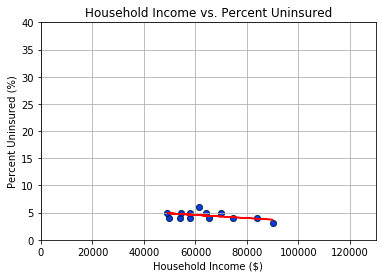

In [6]:
x_values = data_df["Household Income"]
y_values = data_df["Percent Uninsured"]

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq, (80000,35),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Percent Uninsured")
plt.ylabel("Percent Uninsured (%)")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,130000)
plt.ylim(0,40)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/MAIncome_vs_Unninsure.png')

plt.show()



The r-squared is: -0.15110509931002286


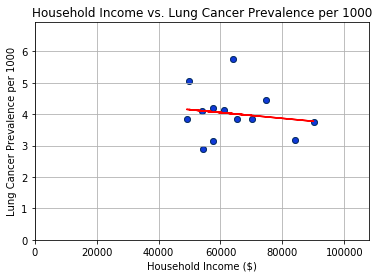

In [7]:
x_values = data_df["Household Income"]
y_values = data_df["Cancer Prevalence per 1000"]
x_max = max(x_values)*1.2
y_max = max(y_values)*1.2

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(80000,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Household Income vs. Lung Cancer Prevalence per 1000")
plt.ylabel("Lung Cancer Prevalence per 1000")
plt.xlabel("Household Income ($)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,x_max)
plt.ylim(0,y_max)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/MAIncome_vs_CancerPrevalence.png')

plt.show()

The r-squared is: 0.1371110168821607


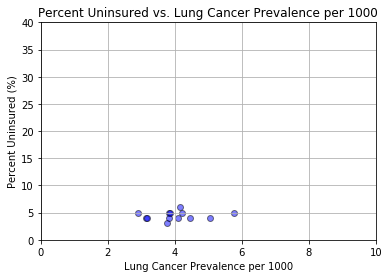

In [8]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Percent Uninsured"]
# print(max(x_values))
# print( max(y_values))

# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Percent Uninsured vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Percent Uninsured (%)")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,40)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/MAuninsured_vs_CancerPrevalence.png')

plt.show()


The r-squared is: -0.4342340963539988


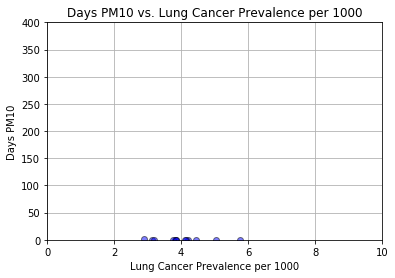

In [9]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days PM10"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days PM10 vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days PM10")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/MAParticulatesPM10_vs_CancerPrevalence.png')

plt.show()

The r-squared is: 0.13008481481096276


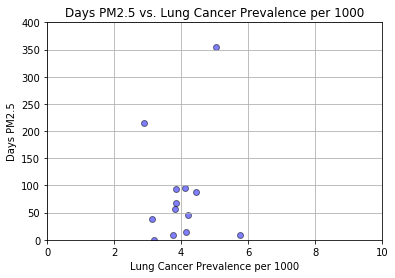

In [10]:
x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days PM2.5"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days PM2.5 vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days PM2.5")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)

# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/MAParticulatesPM25_vs_CancerPrevalence.png')

plt.show()

The r-squared is: -0.06728258884225471


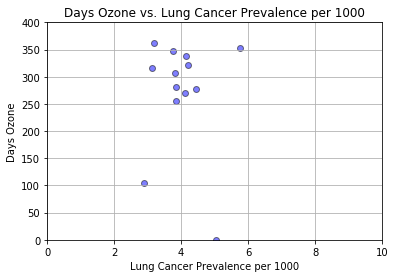

In [11]:

x_values = data_df["Cancer Prevalence per 1000"]
y_values = data_df["Days Ozone"]
# print(max(x_values))
# print( max(y_values))
# the linear model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,8),fontsize=10,color="red")

plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",alpha=0.5)

#labels
plt.title(f"Days Ozone vs. Lung Cancer Prevalence per 1000")
plt.xlabel("Lung Cancer Prevalence per 1000")
plt.ylabel("Days Ozone")
plt.grid(True)
# Add x limits and y limits
plt.xlim(0,10)
plt.ylim(0,400)
rsq=rvalue*rvalue
# Print the correlation coeficient
print(f"The r-squared is: {rvalue}")
# Save the figure
plt.savefig(f'output_plots/MAOzone_vs_CancerPrevalence.png')

plt.show()

## Heatmap 

In [13]:
# Configure gmaps with API key
gmaps.configure(api_key=gkey)


In [14]:
# Store 'Lat' and 'Lng' into  locations 
locations = data_df[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
income_rate = data_df["Household Income"].astype(float)
smokers_rate = data_df["Percent Adult Smokers"].astype(float)
cancer_rate = data_df["Cancer Prevalence per 1000"].astype(float)

In [15]:
# Create a  Heatmap layer
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=income_rate, 
                                 dissipating=False, max_intensity=100000,
                                 point_radius = 0.3)
fig.add_layer(heat_layer)
plt.savefig(f'output_plots/CancerMAheatmap.png')
fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [16]:
# Create  Heatmap layer
fig = gmaps.figure()
heat_layer2 = gmaps.heatmap_layer(locations, weights=cancer_rate, 
                                 dissipating=False, max_intensity=5,
                                 point_radius = 0.4)
fig.add_layer(heat_layer2)

fig


Figure(layout=FigureLayout(height='420px'))

In [17]:
# # Create a combined map
# fig = gmaps.figure()

# fig.add_layer(heat_layer2)
# fig.add_layer(heat_layer)

# fig